In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set Pandas display options to show all columns and rows while printing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('../data/IEEE_2024_positioning_evaluation.csv')

In [4]:
df.head(5)

,image,setup,Trunk-Cam_dist[mm],ObjType,Position,Xgt[m],Ygt[m],Zgt[m],Xestimated[m],Yestimated[m],Zestimated[m],Manhattan[m],Euclidean[m]
0,color_1_2_1.png,2D,1531.0,Apple,1,-0.5,1.892,0,-0.504663,1.937640,0.062,0.11,0.078102
1,color_1_2_1.png,2D,1531.0,Apple,2,0.0,1.892,0,0.000074,1.950542,0.053,0.11,0.078102
2,color_1_2_1.png,2D,1531.0,Apple,3,0.5,1.892,0,0.495595,1.925670,0.059,0.10,0.072111
3,color_1_2_1.png,2D,1531.0,Apple,4,-0.5,1.592,0,-0.506355,1.640229,0.049,0.11,0.071414
4,color_1_2_1.png,2D,1531.0,Apple,5,0.0,1.593,0,0.001157,1.640010,0.043,0.09,0.064031


In [5]:
# chunks
# 2D
df_2D = df.loc[df['setup'] == '2D'].copy()
df_2D_apples = df.loc[(df['setup'] == '2D') & (df['ObjType'] == 'Apple')].copy()
df_2D_tennisballs = df.loc[(df['setup'] == '2D') & (df['ObjType'] == 'Tennis_ball')].copy()

# 3d
df_3D = df.loc[df['setup'] == '3D'].copy()
df_3D_apples = df.loc[(df['setup'] == '3D') & (df['ObjType'] == 'Apple')].copy()
df_3D_tennisballs = df.loc[(df['setup'] == '3D') & (df['ObjType'] == 'Tennis_ball')].copy()

In [6]:
df_2D_apples.describe()

,Trunk-Cam_dist[mm],Position,Xgt[m],Ygt[m],Zgt[m],Xestimated[m],Yestimated[m],Zestimated[m],Manhattan[m],Euclidean[m]
count,396.000000,396.000000,396.000000,396.000000,396.0,396.000000,396.000000,396.000000,396.000000,396.000000
mean,1532.545455,8.000000,0.000000,1.292144,0.0,-0.003916,1.326555,0.028554,0.070278,0.048336
std,9.853892,4.288932,0.408765,0.423285,0.0,0.415258,0.435004,0.016561,0.026513,0.018465
min,1511.000000,1.000000,-0.500000,0.687000,0.0,-0.525696,0.681244,-0.024000,0.010000,0.010000
25%,1528.000000,4.000000,-0.500000,0.990000,0.0,-0.507966,1.007837,0.016000,0.050000,0.036056
50%,1535.000000,8.000000,0.000000,1.292000,0.0,-0.001056,1.334180,0.030000,0.070000,0.050990
75%,1538.000000,12.000000,0.500000,1.593000,0.0,0.497931,1.642686,0.042000,0.090000,0.064031
max,1549.000000,15.000000,0.500000,1.898000,0.0,0.521285,1.970292,0.065000,0.130000,0.086603


In [7]:
for df_chunk in [df_2D, df_2D_apples, df_2D_tennisballs, 
                 df_3D, df_3D_apples, df_3D_tennisballs]:
    
    rmse_manhattan = np.sqrt(np.sum(df_chunk['Manhattan[m]'] ** 2) / df_chunk['Manhattan[m]'].count())
    rmse_euclidean = np.sqrt(np.sum(df_chunk['Euclidean[m]'] ** 2) / df_chunk['Euclidean[m]'].count())

    print(rmse_manhattan, rmse_euclidean)

0.07558659493146472 0.05203275321763594
0.07510094217219587 0.05173504761295911
0.09451631252505217 0.06377042156569662
0.24665360325768604 0.20892901505854405
0.24060349435071787 0.19498164611996546
0.2699623325891024 0.2581912311919341


In [8]:
# Define the list of dataframes
dataframes = {
    '2D': df_2D,
    '2D_apples': df_2D_apples,
    '2D_TB': df_2D_tennisballs,
    '3D': df_3D,
    '3D_apples': df_3D_apples,
    '3D_TB': df_3D_tennisballs
}

# Initialize a list to store the results
results = []

# Iterate through the dataframes and calculate RMSE values
for name, df_chunk in dataframes.items():
    
    rmse_manhattan = np.sqrt(np.sum(df_chunk['Manhattan[m]'] ** 2) / df_chunk['Manhattan[m]'].count())
    rmse_euclidean = np.sqrt(np.sum(df_chunk['Euclidean[m]'] ** 2) / df_chunk['Euclidean[m]'].count())

    results.append([name, rmse_manhattan, rmse_euclidean])

# Create a DataFrame from the results
rmse_df = pd.DataFrame(results, columns=['DataFrame', 'RMSE_Manhattan', 'RMSE_Euclidean'])

# Print the resulting DataFrame
print(np.round(rmse_df, 3))


   DataFrame  RMSE_Manhattan  RMSE_Euclidean
0         2D           0.076           0.052
1  2D_apples           0.075           0.052
2      2D_TB           0.095           0.064
3         3D           0.247           0.209
4  3D_apples           0.241           0.195
5      3D_TB           0.270           0.258


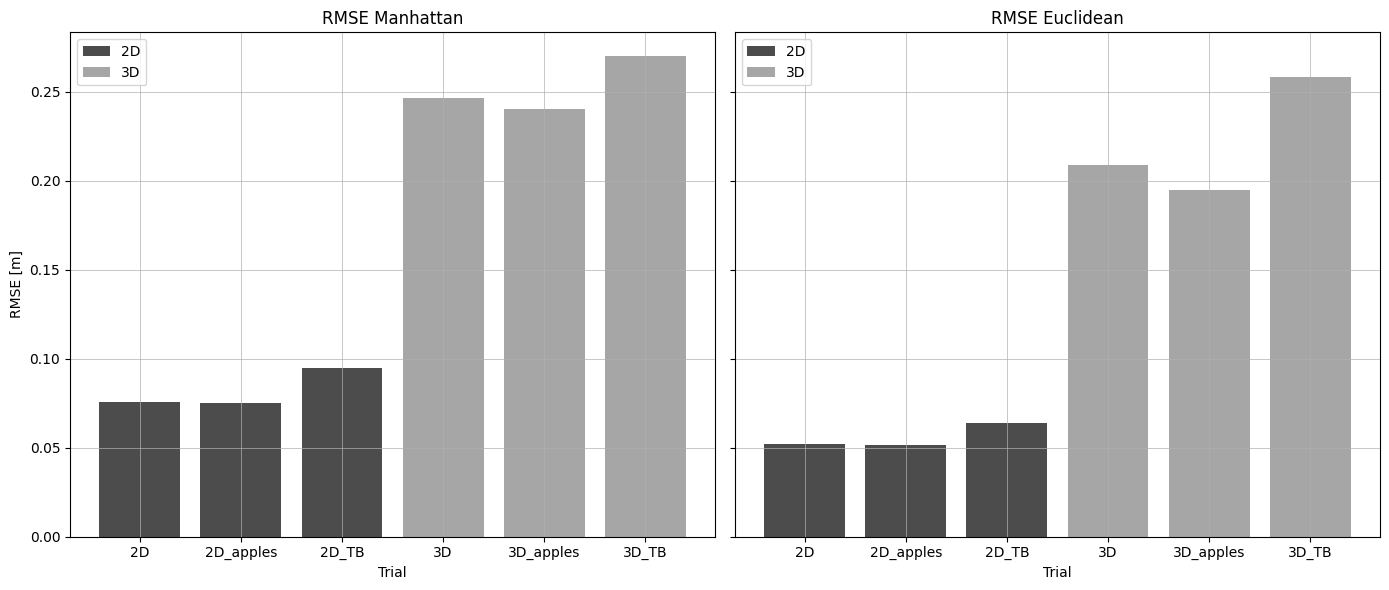

In [9]:
# Add a new column to differentiate between 2D and 3D
rmse_df['Dimension'] = rmse_df['DataFrame'].apply(lambda x: '2D' if '2D' in x else '3D')
rmse_df['Object'] = rmse_df['DataFrame'].apply(lambda x: 'apple' if 'apples' in x else 'TB')

# Plot the histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].grid(lw=.5)
# Histogram for RMSE_Manhattan
for dimension, color in zip(['2D', '3D'], ['k', 'gray']):
    subset = rmse_df[rmse_df['Dimension'] == dimension]
    axes[0].bar(subset['DataFrame'], subset['RMSE_Manhattan'], color=color, label=dimension, alpha=0.7)

axes[0].set_title('RMSE Manhattan')
axes[0].set_xlabel('Trial')
axes[0].set_ylabel('RMSE [m]')
axes[0].legend()


axes[1].grid(lw=.5)
# Histogram for RMSE_Euclidean
for dimension, color in zip(['2D', '3D'], ['k', 'gray']):
    subset = rmse_df[rmse_df['Dimension'] == dimension]
    axes[1].bar(subset['DataFrame'], subset['RMSE_Euclidean'], color=color, label=dimension, alpha=0.7)


axes[1].set_title('RMSE Euclidean')
axes[1].set_xlabel('Trial')
axes[1].legend()


plt.tight_layout()

plt.savefig('../docs/images/results.png', dpi=400)
plt.show()


In [10]:
grouped_df = rmse_df.iloc[:, 1:-1].groupby('Dimension').mean()
grouped_df

,RMSE_Manhattan,RMSE_Euclidean
Dimension,,
2D,0.081735,0.055846
3D,0.252406,0.220701


In [11]:
rmse_df

,DataFrame,RMSE_Manhattan,RMSE_Euclidean,Dimension,Object
0,2D,0.075587,0.052033,2D,TB
1,2D_apples,0.075101,0.051735,2D,apple
2,2D_TB,0.094516,0.063770,2D,TB
3,3D,0.246654,0.208929,3D,TB
4,3D_apples,0.240603,0.194982,3D,apple
5,3D_TB,0.269962,0.258191,3D,TB


In [12]:
grouped_df = rmse_df.iloc[:, 1:].groupby(['Object', 'Dimension']).mean()
grouped_df

RMSE_Manhattan  RMSE_Euclidean
Object Dimension                                
TB     2D               0.085051        0.057902
       3D               0.258308        0.233560
apple  2D               0.075101        0.051735
       3D               0.240603        0.194982

errore per posizione

In [13]:
grouped_df = df.groupby('Position').sum().loc[:, ['Manhattan[m]',	'Euclidean[m]']]

grouped_df['CumError'] = (grouped_df['Manhattan[m]'] + grouped_df['Euclidean[m]']) / 2
grouped_df

,Manhattan[m],Euclidean[m],CumError
Position,,,
1,4.09,2.740562,3.415281
2,4.09,2.903398,3.496699
3,3.74,2.690877,3.215439
4,3.79,2.502033,3.146016
5,3.73,2.703405,3.216703
6,3.64,2.509654,3.074827
7,3.55,2.316276,2.933138
8,2.29,1.807042,2.048521
9,2.77,1.948451,2.359225


<Figure size 1000x500 with 0 Axes>

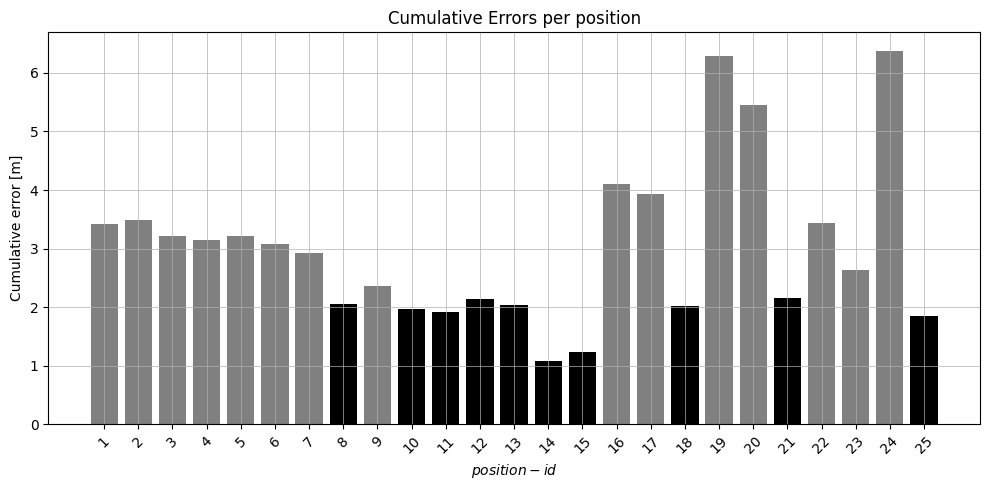

In [14]:
plt.figure(figsize=(10, 5))

# Find the 10 lowest CumErrors
lowest_cumerrors = grouped_df.nsmallest(10, 'CumError')

# Create a color array
colors = ['k' if index in lowest_cumerrors.index else 'grey' for index in grouped_df.index]

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.grid(lw=.5)
plt.bar(grouped_df.index -1, grouped_df['CumError'], color=colors)

plt.xlabel('$position-id$')
plt.ylabel('Cumulative error [m]')
plt.title('Cumulative Errors per position')

# Set ticks to each group
plt.xticks(ticks=np.arange(len(grouped_df.index)), labels=grouped_df.index)

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../docs/images/position_cum_error.png', dpi=400)

plt.show()
